<a href="https://colab.research.google.com/github/Priyanka250807/intern_1_colab/blob/main/task__4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               56 non-null     object 
 1   Road_Type             54 non-null     object 
 2   Time_of_Day           57 non-null     object 
 3   Traffic_Density       57 non-null     float64
 4   Speed_Limit           56 non-null     float64
 5   Number_of_Vehicles    58 non-null     float64
 6   Driver_Alcohol        57 non-null     float64
 7   Accident_Severity     56 non-null     object 
 8   Road_Condition        55 non-null     object 
 9   Vehicle_Type          57 non-null     object 
 10  Driver_Age            56 non-null     float64
 11  Driver_Experience     53 non-null     float64
 12  Road_Light_Condition  55 non-null     object 
 13  Accident              57 non-null     float64
dtypes: float64(7), object(7)
memory usage: 6.6+ KB
None
Weather                 

<ipython-input-21-3ba75a7d8659>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna('Unknown', inplace=True)


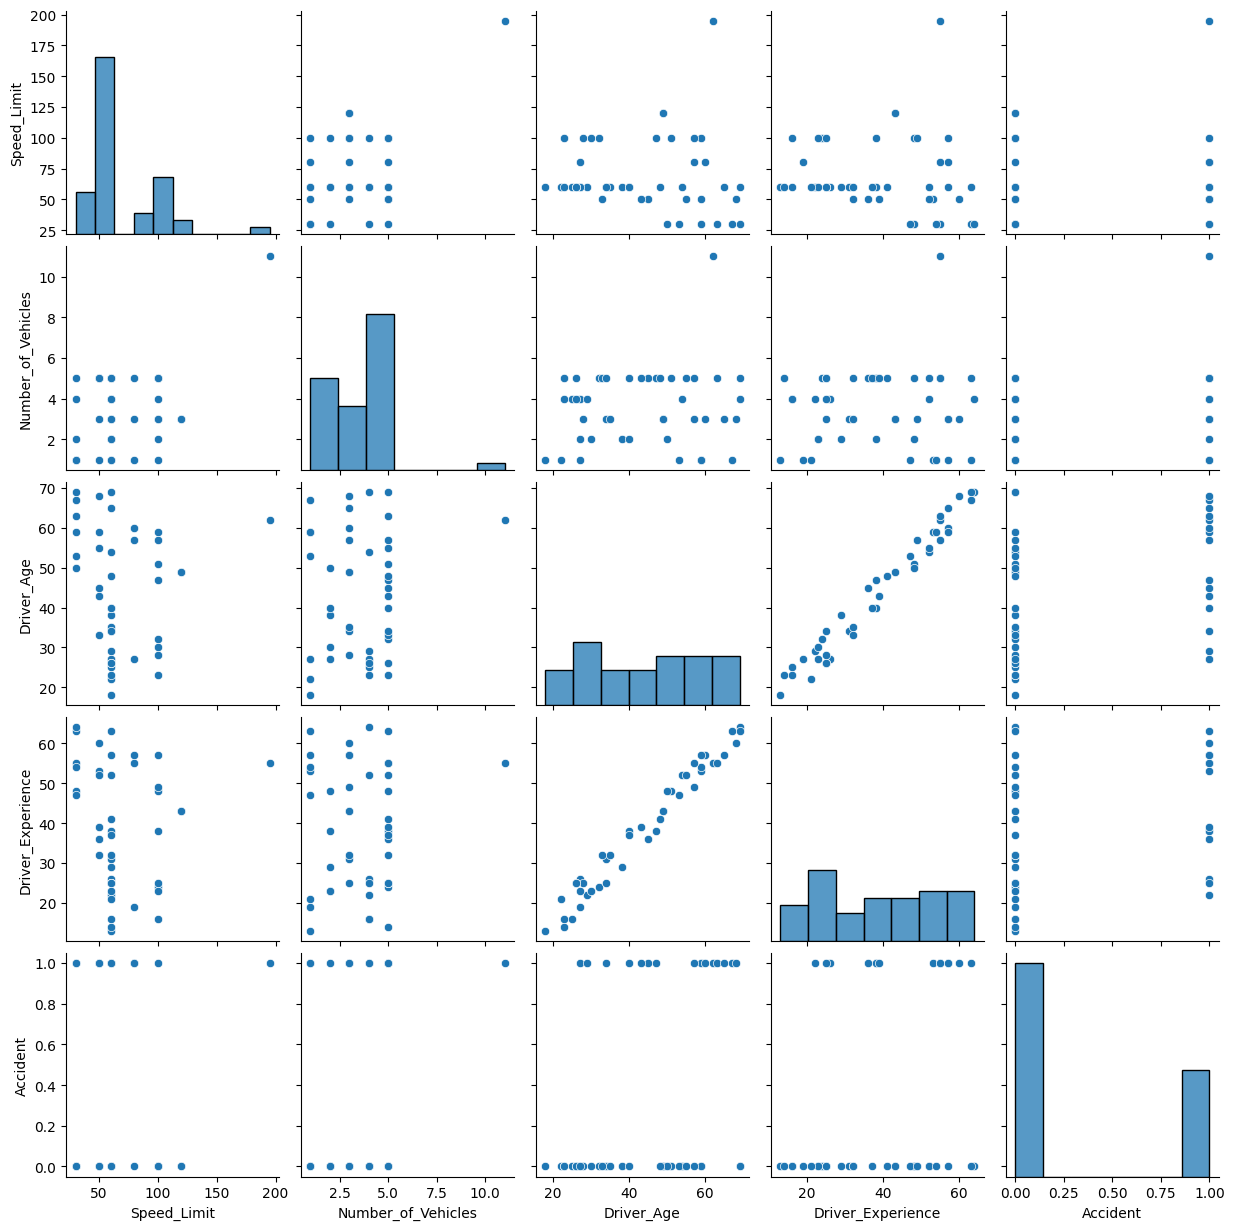

<ipython-input-21-3ba75a7d8659>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Weather', y='Accident', data=data, palette='viridis')


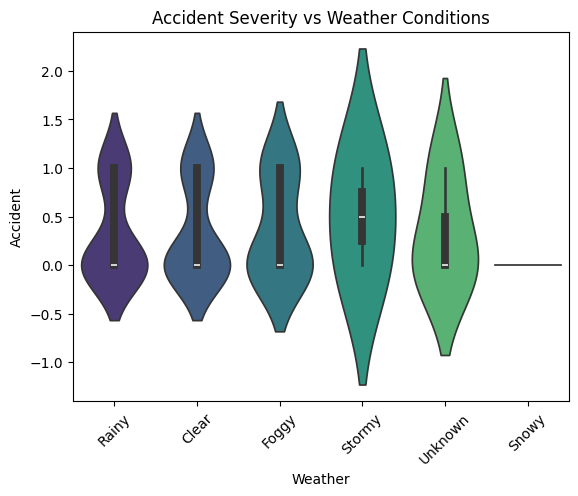

<ipython-input-21-3ba75a7d8659>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Time_of_Day', y='Accident', data=data, palette='viridis')


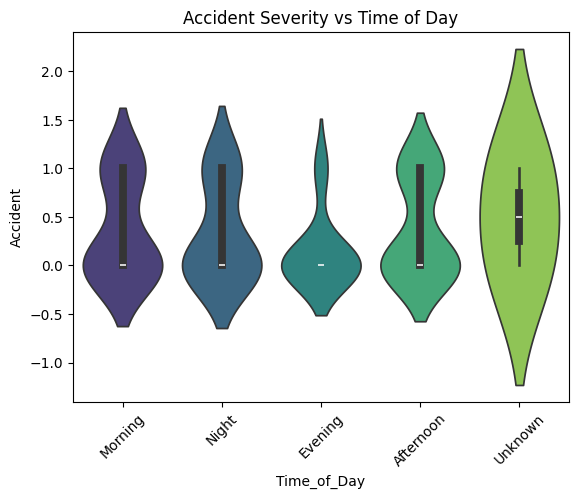

<ipython-input-21-3ba75a7d8659>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Road_Condition', y='Accident', data=data, palette='viridis')


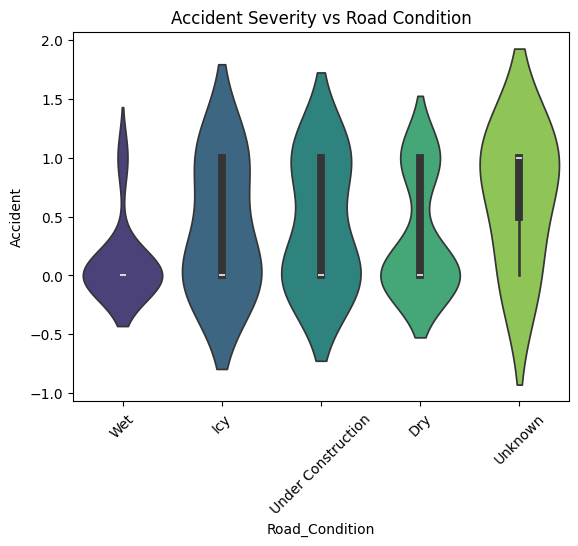

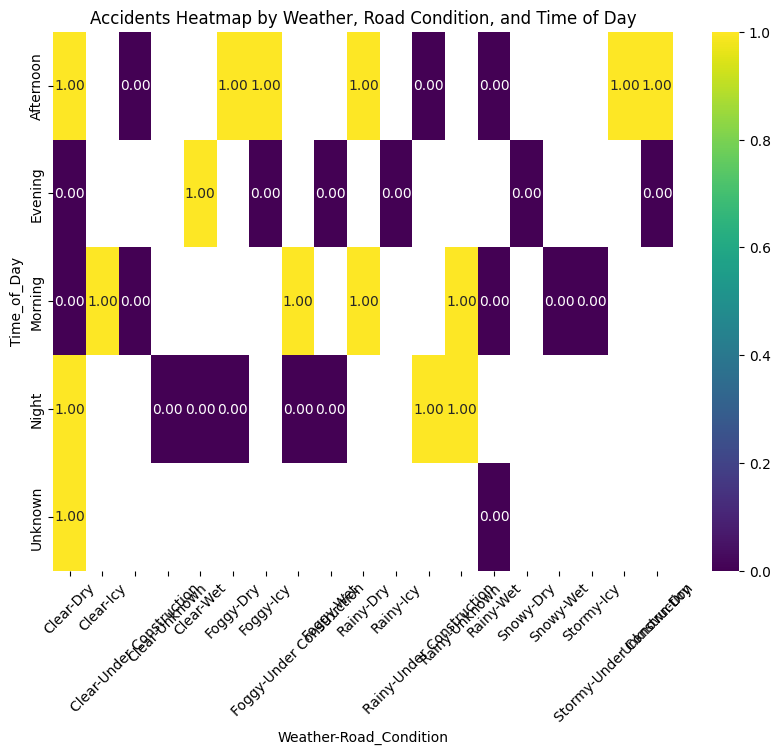

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/task_4.o.xlsx'
data = pd.read_excel(file_path)

# Display basic info and check for missing values
print(data.info())
print(data.isnull().sum())

# Fill missing values with a placeholder
data.fillna('Unknown', inplace=True)

# List of numeric columns to include in the pairplot
numeric_columns = ['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Driver_Experience', 'Accident']

# Verify the columns exist in the dataset
missing_columns = [col for col in numeric_columns if col not in data.columns]
if missing_columns:
    print(f"The following columns are missing: {missing_columns}")
else:
    # Ensure all columns are numeric
    for col in numeric_columns:
        if not pd.api.types.is_numeric_dtype(data[col]):
            print(f"Column '{col}' is not numeric. Attempting to convert...")
            data[col] = pd.to_numeric(data[col], errors='coerce')

    # Drop rows with NaN values after conversion
    data.dropna(subset=numeric_columns, inplace=True)

    # Create the pairplot
    sns.pairplot(data[numeric_columns])
    plt.show()

# Violin plot for 'Accident' vs 'Weather'
sns.violinplot(x='Weather', y='Accident', data=data, palette='viridis')
plt.title('Accident Severity vs Weather Conditions')
plt.xticks(rotation=45)
plt.show()

# Violin plot for 'Accident' vs 'Time_of_Day'
sns.violinplot(x='Time_of_Day', y='Accident', data=data, palette='viridis')
plt.title('Accident Severity vs Time of Day')
plt.xticks(rotation=45)
plt.show()

# Violin plot for 'Accident' vs 'Road_Condition'
sns.violinplot(x='Road_Condition', y='Accident', data=data, palette='viridis')
plt.title('Accident Severity vs Road Condition')
plt.xticks(rotation=45)
plt.show()

# Heatmap of Accident frequency by Road Condition, Weather, and Time of Day
try:
    accident_heatmap_data = data.groupby(['Weather', 'Road_Condition', 'Time_of_Day'])['Accident'].sum().unstack().T

    # Use fmt='.2f' to display numbers with two decimal points
    plt.figure(figsize=(10, 7))
    sns.heatmap(accident_heatmap_data, annot=True, cmap='viridis', fmt='.2f')  # Changed fmt='d' to fmt='.2f'
    plt.title('Accidents Heatmap by Weather, Road Condition, and Time of Day')
    plt.xticks(rotation=45)
    plt.show()
except Exception as e:
    print(f"Error generating heatmap: {e}")
